# Andreas Tsantilas: Central Lmit Theorem

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #will use this for plotting

In [358]:
import distributions

In [359]:
dst = distributions.Dist_ajt540()
x = dst.rvs(100000)

Here is the True Mean/SD vs. Sample Mean/SD

In [438]:
print("True mean:", dst.mean(), "|| Sample mean:", np.mean(x))

True mean: 0.6791530944625407 || Sample mean: 0.6823953921203535


In [439]:
print("True SD:", dst.std(), "|| Sample SD:", np.std(x))

True SD: 0.17339222485840364 || Sample SD: 0.17302563914676725


In [440]:
mybins = np.linspace(dst.x_min, dst.x_max, 50)

70.7 ms ± 6.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


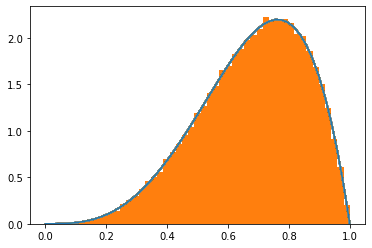

In [363]:
%%timeit
plt.plot(mybins, dst.pdf(mybins))
grph = plt.hist(x, bins=mybins, density = True)

## Convolving my own distribution $N$ times

In [15]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

### $N = 1$

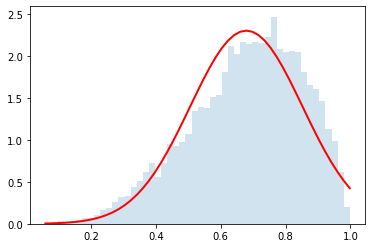

In [16]:
dist = distributions.Dist_ajt540()
do_convolution(dist,1)

### $N =3$


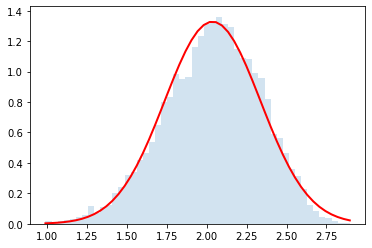

In [17]:
do_convolution(dist,3)

### $N=50$

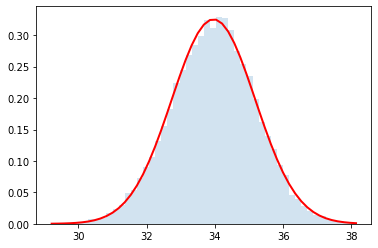

In [18]:
do_convolution(dist,50)

The more convolutions we do, the closer to a normal distribution it becomes.

## Convolution of N randomly selected distributions

In [364]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 100000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

In [365]:
# some funny python to make a list of all the distributions for convenience
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
# print out their names
all_distributions_dict.keys()

dict_keys(['Dist_cmr653', 'Dist_rdm445', 'Dist_speedreed', 'Dist_ltw244', 'Dist_bt1369', 'Dist_kc90', 'Dist_rmr557', 'Dist_jam1535', 'Dist_at4227', 'Dist_os852', 'Dist_ia1113', 'Dist_knd286', 'Dist_aew492', 'Dist_cah736', 'Dist_phh250', 'Dist_ks938', 'Dist_sk7372', 'Dist_kc90_4', 'Dist_sj2879', 'Dist_dmc731', 'Dist_sdl433', 'Dist_pbg240', 'Dist_pw1091', 'Dist_lac683', 'Dist_ajt540', 'Dist_sm6779', 'Dist_mkb452', 'Dist_npl248', 'Dist_speedreed2', 'Dist_emm815', 'Dist_yx1796', 'Dist_abw400', 'Dist_sea438', 'Dist_sb6187', 'Dist_ejt352', 'Dist_tt1392', 'Dist_jdg577'])

In [366]:
## Do tests
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 10000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            #print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            #print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                         # np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            #print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          #np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            #print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                         # np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            #print("pdf was negative in some places")
            continue                    

        else:
            #print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        #print("%s has errors, does't work" %(cls.__name__))
        continue

#print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])



C:\Users\andre\Documents\GitHub\intro-exp-phys-II\distributions\Dist_cah736.py:13: RuntimeWarning: invalid value encountered in true_divide
  return ((np.sin(x)**2))/(1.55595*x)
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


Dist_ejt352 0.7071067811865476
Dist_sb6187 1.902
Dist_sj2879 2.32379000772445
Dist_rdm445 0.7071067811865476
Dist_yx1796 0.5157518783291051


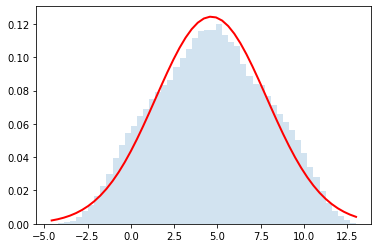

In [367]:
do_random_convolution(ok_distributions_list,5)

Dist_speedreed2 1.4142135623730951
Dist_sea438 0.7071067811865476
Dist_ia1113 0.14344336861632886
Dist_ajt540 0.17339222485840364
Dist_os852 0.6545248448388085
Dist_yx1796 0.5157518783291051
Dist_sm6779 0.27929
Dist_ejt352 0.7071067811865476
Dist_at4227 0.683667
Dist_npl248 0.7071067811865476
Dist_pw1091 0.88669
Dist_ltw244 0.581033561853
Dist_yx1796 0.5157518783291051
Dist_pw1091 0.88669
Dist_pw1091 0.88669
Dist_ia1113 0.14344336861632886
Dist_sea438 0.7071067811865476
Dist_ejt352 0.7071067811865476
Dist_pw1091 0.88669
Dist_abw400 0.26186146828319085
Dist_knd286 0.3070547093925828
Dist_bt1369 1.56953460038
Dist_rmr557 0.609449400220044
Dist_cmr653 1.248156535392138
Dist_sb6187 1.902
Dist_lac683 0.5394490624751247
Dist_sdl433 0.3872983346207417
Dist_kc90_4 0.7071067811865476
Dist_ltw244 0.581033561853
Dist_cmr653 1.248156535392138
Dist_sj2879 2.32379000772445
Dist_sj2879 2.32379000772445
Dist_phh250 0.23570226039551584
Dist_sdl433 0.3872983346207417


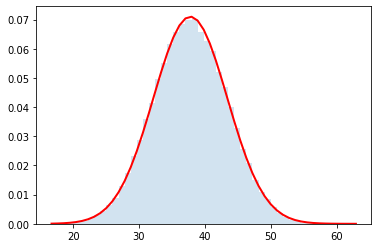

In [23]:
do_random_convolution(ok_distributions_list, len(ok_distributions_list))

## Here is some code I made that does a convolution of all the distributions in a given list

In [441]:
def convolve_all(list_of_distributions):
    n_samples = 100000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in list_of_distributions:
        dist = dist_class()
        #print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

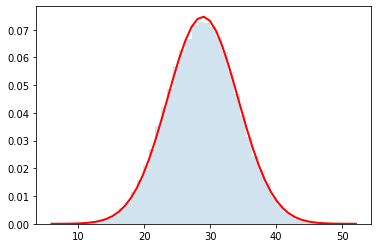

In [442]:
convolve_all(ok_distributions_list)

Look at that fit!

# EXTRA CREDIT: $\chi^2$ analysis

In [283]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


## Goodness of fit

Foremost, let's observe the "goodness of fit" of the normal for my own distribution.

In [405]:
n_bins=50
dst = distributions.Dist_ajt540()
x = dst.rvs(10000)

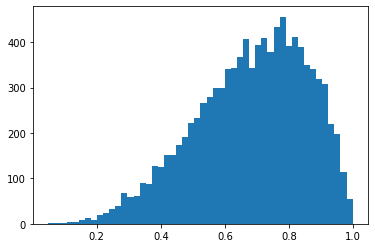

In [406]:
counts, bins, patches = plt.hist(x, bins=n_bins,density=False)

step = bins[1]-bins[0]
bin_centers = bins[:-1]+ 0.5*step

In [407]:
normalization = x.size*step

In [408]:
prediction = normalization*norm.pdf(bin_centers, loc = dst.mean(), scale =dst.std())

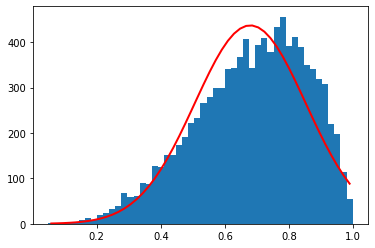

In [409]:
counts, bins, patches = plt.hist(x, bins=n_bins,density=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [410]:
np.sum(prediction), np.sum(counts)

(9672.426055972224, 10000.0)

In [411]:
from scipy.stats import chisquare

In [412]:
from scipy.stats import chi2

Here, we print the chi-squared value and the p-value.

In [413]:
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue

(642.5952422719294, 2.0280392654966707e-104)

The p-value here is miniscule; in other words, the gaussian is not a very good fit for my distribution.

In [414]:
chi2.sf(chisq_obs,counts.size)

7.394174172034832e-104

## Chi-Square Code

In [428]:
def do_random_convolution_with_chi2(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        #print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )

    
    counts, bins, patches = plt.hist(q,bins=50, density=False, alpha=.2)
    
    step = bins[1]-bins[0]
    bin_centers = bins[:-1]+ 0.5*step
    
    normalization = q.size*step
    
    prediction = normalization*norm.pdf(bin_centers, loc = mean_q, scale = std_q)
    
    chisq_obs, pvalue = chisquare(counts, prediction)
    print("chi^2 value:", chisq_obs)
    print("p value:" , pvalue)
    
    print("survival function:", chi2.sf(chisq_obs,counts.size))
    
    plt.plot(bin_centers, prediction, lw=2, c='r')

chi^2 value: 7607.08881120774
p value: 0.0
survival function: 0.0


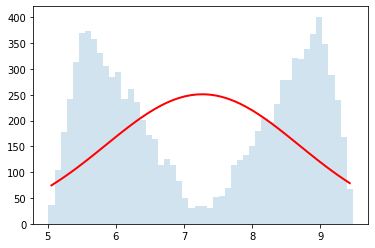

In [429]:
do_random_convolution_with_chi2(ok_distributions_list, 2)

chi^2 value: 74.55344374034723
p value: 0.01077128654808512
survival function: 0.013756467623787827


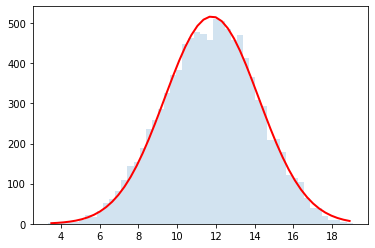

In [430]:
do_random_convolution_with_chi2(ok_distributions_list, 4)

chi^2 value: 63.94419908272211
p value: 0.07429014253850341
survival function: 0.08886030865118139


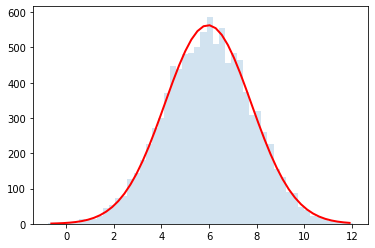

In [431]:
do_random_convolution_with_chi2(ok_distributions_list, 8)

chi^2 value: 59.86829129074393
p value: 0.13740447139688655
survival function: 0.16006566664182206


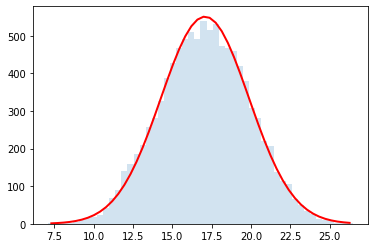

In [435]:
do_random_convolution_with_chi2(ok_distributions_list, 16)

chi^2 value: 49.19150288318621
p value: 0.46545254343466824
survival function: 0.5057725441159279


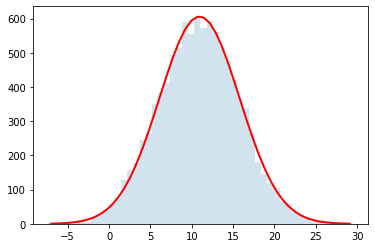

In [437]:
do_random_convolution_with_chi2(ok_distributions_list, 32)